 ALGORITMO GENETICO TRADICIONAL PARA 
LA SOLUCION DEL PROBLEMA DE LAS CIUDADES   

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math

In [77]:
data = pd.read_excel('Ciudades.xlsx')
data.describe()

,x,y
count,28.000000,28.000000
mean,52.214286,40.964286
std,27.312129,28.356830
min,10.000000,5.000000
25%,29.500000,16.000000
50%,54.000000,32.000000
75%,77.250000,57.500000
max,99.000000,99.000000


In [78]:
data.head(5)

,Ciudad,x,y
0,A,10,12
1,B,12,16
2,C,22,22
3,D,30,30
4,E,35,28


In [79]:
data = data.dropna(axis=0, how='any', ignore_index=True)
data.head(100)


,Ciudad,x,y
0,A,10,12
1,B,12,16
2,C,22,22
3,D,30,30
4,E,35,28
5,F,53,15
6,G,39,9
7,H,45,16
8,I,61,5
9,J,69,23


In [80]:
#data.count()
test =  data.loc[data['Ciudad'] == 'A']
print(test.iloc[0]['x'])
print(test.iloc[0]['y'])



10
12


In [81]:
lbls = data.iloc[:,0].values
x = data.iloc[:, 1]
y = data.iloc[:, 2]
print(lbls)
print(x)
print(y)


['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z' 'AA' 'AB']
0     10
1     12
2     22
3     30
4     35
5     53
6     39
7     45
8     61
9     69
10    78
11    85
12    12
13    16
14    28
15    28
16    62
17    95
18    84
19    64
20    31
21    55
22    45
23    57
24    90
25    77
26    99
27    80
Name: x, dtype: int64
0     12
1     16
2     22
3     30
4     28
5     15
6      9
7     16
8      5
9     23
10    15
11    17
12    32
13    42
14    56
15    12
16    55
17    32
18    53
19    36
20    62
21    70
22    55
23    91
24    99
25    65
26    99
27    80
Name: y, dtype: int64


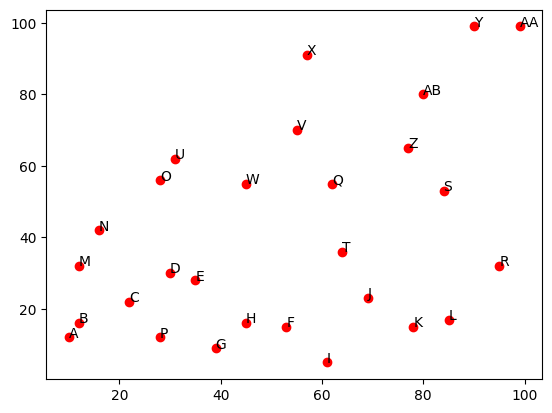

In [82]:
fig, ax = plt.subplots()
ax.plot(x,y,'ro')
for i, text in enumerate(lbls):
    ax.text(x[i],y[i],text)
plt.show()

# Se inicia con el desarrollo del algoritmo genetico

#### Generar poblacion aleatoria

In [83]:
def generarPoblacionAleatoria(tam_poblacion,labels):
    poblacion = []
    num_ciudades = len(lbls)
    for i in range(tam_poblacion):
        individuo = []
        while(len(individuo) <num_ciudades):
        #for j in range(num_ciudades):
            label = random.choice(labels)
            if label not in individuo:
                individuo.append(label) 
        poblacion.append(individuo)
    return poblacion

### Evaluar la poblacion

In [84]:
def fitness(poblacion,x,y,data):
    distancias = []
    
    for individuo in poblacion:
        distancia = 0
        #print("individo")
        #print(individuo)
        for i in range(len(individuo)-1):
            ind1 = data.loc[data['Ciudad'] == individuo[i]]
            ind2 = data.loc[data['Ciudad'] == individuo[i+1]]
            xind1 = ind1.iloc[0]['x']
            yind1 = ind1.iloc[0]['y']
            xind2 = ind2.iloc[0]['x']
            yind2 = ind2.iloc[0]['y']
            
            dist = math.sqrt((xind2-xind1)**2+(yind2-yind1)**2)
            #print(dist)
            distancia +=dist
        distancias.append(distancia)
            
            
    return distancias
        

In [85]:
def selection(poblacion,distancias):
    combinados = list(zip(distancias, poblacion))
    combinados_ordenados = sorted(combinados)
    dist, pob = zip(*combinados_ordenados)
    
    return pob[0:int(len(poblacion)/2)],dist[0:int(len(poblacion)/2)]
    

In [86]:
def quitarDuplicados(hijo,lbls):
    #FUNCION PARA QUITAR LAS LETRAS DUPLICADAS Y COLOCAR LAS FALTANTES
    letras_usadas = set(hijo)
    letras_faltantes = []
    for letra in lbls:
        if letra not in letras_usadas:
            letras_faltantes.append(letra)
    res = []
    for letra in hijo:
        if letra in letras_usadas:
            res.append(letra)
            letras_usadas.remove(letra)
        else:
            res.append(None)
    #la lista tiene posiciones vacias donde hay repetidos
    id = 0
    for i in range(len(res)):
        if res[i] is None:
            res[i] = letras_faltantes[id]
            id +=1
    return res
        
            

In [87]:
def cruza_mutacion(progenitores,prob_cruza,prob_muta,lbls):
    hijos_nuevos = []
    for i in range(0,len(progenitores)-1,2):
        
        #seleccion de los padres
        padre1 = progenitores[i]
        padre2 = progenitores[i+1]
        
        if random.random() < prob_cruza:
            #seleccion punto de cruza
            punto1 = random.randint(1, len(padre1)-2)
            punto2 = random.randint(punto1+1, len(padre1)-1)    
            
            #creacion de hijos
            hijo1 = padre1[:punto1] + padre2[punto1:punto2] + padre1[punto2:] 
            hijo2 = padre2[:punto1] + padre1[punto1:punto2] + padre2[punto2:]
            
            #quitar repetidos y colocar los faltantes
            hijo1 = quitarDuplicados(hijo1,lbls)
            hijo2 = quitarDuplicados(hijo2,lbls)
            
            
        else: 
            hijo1 = padre1
            hijo2 = padre2
        
        if random.random() < prob_muta:
            print("Generando muta")
            punto_muta1 = random.randint(0,len(hijo1)-1)
            punto_muta2 = random.randint(0,len(hijo2)-1)
            aux1 = hijo1[punto_muta1]
            hijo1[punto_muta1] = hijo1[punto_muta2]
            hijo1[punto_muta2] = aux1
            aux2 = hijo2[punto_muta1]
            hijo2[punto_muta1] = hijo2[punto_muta2]
            hijo2[punto_muta2] = aux2
            
        #AGREGO NUEVOS HIJOS A LA LISTA    
        hijos_nuevos.append(hijo1)
        hijos_nuevos.append(hijo2)
    
    return hijos_nuevos
        
        
        

# funcion principal


In [88]:
#generar poblacion aleatoria
tam_poblacion = 20
probabilidad_cruza = 0.5
probabilidad_muta = 0.0
generaciones = 100


poblacion = generarPoblacionAleatoria(tam_poblacion,lbls)
#evaluacion de la poblacion
distancias = fitness(poblacion,x,y,data)
#seleccion
seleccionados,distancias_seleccionados = selection(poblacion,distancias)
#print(len(seleccionados))
#cruza y mutacion
nuevos_hijos = cruza_mutacion(seleccionados,probabilidad_cruza,probabilidad_muta,lbls)

#unir poblacion final
poblacion = list(seleccionados)+nuevos_hijos
print(distancias[0])



1399.2131856353083


In [89]:
punto1 = random.randint(1, len(seleccionados[0])-2)
punto2 = random.randint(punto1+1, len(seleccionados[0])-1)
print(punto1,punto2,len(seleccionados[0]))

26 27 28


In [90]:
#generar poblacion aleatoria
tam_poblacion = 100
probabilidad_cruza = 0.25
probabilidad_muta = 0.05
generaciones = 50


poblacion = generarPoblacionAleatoria(tam_poblacion,lbls)
num_generaciones = 0

mejor_individuo = []
mejor_distancia = 0
hist_individuos = []
hist_distancias = []
while(num_generaciones < generaciones):
    
    #evaluacion de la poblacion
    distancias = fitness(poblacion,x,y,data)
    #seleccion
    seleccionados,distancias_seleccionados = selection(poblacion,distancias)
    #print(len(seleccionados))
    #cruza y mutacion
    nuevos_hijos = cruza_mutacion(seleccionados,probabilidad_cruza,probabilidad_muta, lbls)
    
    #unir poblacion final
    poblacion = list(seleccionados)+nuevos_hijos
    
    distancias = fitness(poblacion,x,y,data)
    seleccionados,distancias_seleccionados = selection(poblacion,distancias)
    mejor_individuo = seleccionados[0]
    mejor_distancia = distancias_seleccionados[0]
    
    hist_individuos.append(mejor_individuo)
    hist_distancias.append(mejor_distancia)
    
    print("GENERACION ---{} MEJOR DISTANCIA----{} MEJOR_INDIVIDUO---{}".format(num_generaciones,mejor_distancia,mejor_individuo))
    num_generaciones += 1
    
    


Generando muta
Generando muta
Generando muta
GENERACION ---0 MEJOR DISTANCIA----1062.3446417174562 MEJOR_INDIVIDUO---['M', 'U', 'AA', 'E', 'D', 'G', 'P', 'B', 'Y', 'AB', 'V', 'R', 'N', 'A', 'C', 'O', 'L', 'S', 'X', 'H', 'J', 'K', 'W', 'Q', 'Z', 'T', 'F', 'I']
GENERACION ---1 MEJOR DISTANCIA----1062.3446417174562 MEJOR_INDIVIDUO---['M', 'U', 'AA', 'E', 'D', 'G', 'P', 'B', 'Y', 'AB', 'V', 'R', 'N', 'A', 'C', 'O', 'L', 'S', 'X', 'H', 'J', 'K', 'W', 'Q', 'Z', 'T', 'F', 'I']
Generando muta
Generando muta
GENERACION ---2 MEJOR DISTANCIA----1069.483885963686 MEJOR_INDIVIDUO---['M', 'B', 'C', 'Q', 'G', 'P', 'N', 'U', 'X', 'Z', 'D', 'F', 'I', 'R', 'S', 'H', 'W', 'T', 'J', 'E', 'AA', 'AB', 'V', 'K', 'L', 'Y', 'A', 'O']
Generando muta
Generando muta
Generando muta
GENERACION ---3 MEJOR DISTANCIA----1069.483885963686 MEJOR_INDIVIDUO---['M', 'B', 'C', 'Q', 'G', 'P', 'N', 'U', 'X', 'Z', 'D', 'F', 'I', 'R', 'S', 'H', 'W', 'T', 'J', 'E', 'AA', 'AB', 'V', 'K', 'L', 'Y', 'A', 'O']
Generando muta
Generan

In [91]:
print(mejor_distancia)
print(mejor_individuo)
#obtener x y de cada individuo 
x = []
y = []
for gen in mejor_individuo:
    x.append(data[data['Ciudad'] == gen].iloc[0]['x'])
    y.append(data[data['Ciudad'] == gen].iloc[0]['y'])
#print(y)
    


931.4246773748033
['G', 'P', 'T', 'Q', 'V', 'Z', 'S', 'K', 'AA', 'W', 'O', 'E', 'A', 'U', 'C', 'M', 'B', 'D', 'N', 'J', 'L', 'R', 'I', 'X', 'AB', 'Y', 'F', 'H']


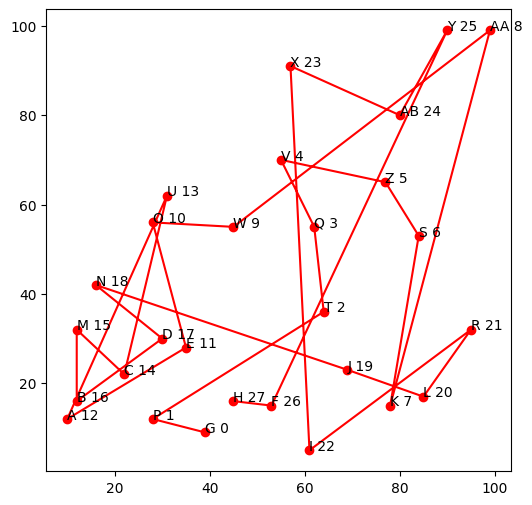

In [92]:
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(x,y,'-ro')
cont = 0
for i, text in enumerate(mejor_individuo):
    txt = text+" "+str(cont)
    ax.text(x[i],y[i],txt)
    cont +=1
plt.show()

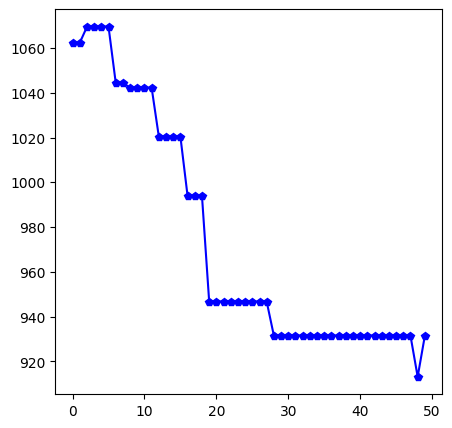

In [93]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(hist_distancias,'-bp')
plt.show()